# Tes `SORA` dengan data SAO 184652

In [59]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

In [60]:
df = pd.read_csv('sao184652.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
5496,7996.0,[17:46:22.1141629],6403.0,332720.0,8819.38,822.32,-37,12368,387.0,221.0
5497,7997.0,[17:46:22.1242625],-1297.0,325168.0,8823.38,848.2,-37,11632,387.0,221.0
5498,7998.0,[17:46:22.1343620],-185.0,326704.0,8834.85,827.42,-37,12272,387.0,221.0
5499,7999.0,[17:46:22.1444616],-1041.0,324912.0,8809.54,829.84,-37,11952,387.0,221.0
5500,8000.0,[17:46:22.1545611],-3398.0,323248.0,8828.28,828.11,-37,12176,387.0,221.0


In [61]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
5496,7996.0,2022-08-10 17:46:22.114162,6403.0,332720.0,8819.38,822.32,-37,12368,387.0,221.0
5497,7997.0,2022-08-10 17:46:22.124262,-1297.0,325168.0,8823.38,848.2,-37,11632,387.0,221.0
5498,7998.0,2022-08-10 17:46:22.134362,-185.0,326704.0,8834.85,827.42,-37,12272,387.0,221.0
5499,7999.0,2022-08-10 17:46:22.144461,-1041.0,324912.0,8809.54,829.84,-37,11952,387.0,221.0
5500,8000.0,2022-08-10 17:46:22.154561,-3398.0,323248.0,8828.28,828.11,-37,12176,387.0,221.0


In [62]:
data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
5496,7996.0,2022-08-10 17:46:22.114162,6403.0
5497,7997.0,2022-08-10 17:46:22.124262,-1297.0
5498,7998.0,2022-08-10 17:46:22.134362,-185.0
5499,7999.0,2022-08-10 17:46:22.144461,-1041.0
5500,8000.0,2022-08-10 17:46:22.154561,-3398.0


In [63]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,2500.0,2022-08-10 17:45:26.606374,100267.0,2459802.2398912776,0.2398912776261568
1,2501.0,2022-08-10 17:45:26.616474,105706.0,2459802.2398913945,0.23989139450713992
2,2502.0,2022-08-10 17:45:26.626574,100198.0,2459802.2398915114,0.23989151138812304
3,2503.0,2022-08-10 17:45:26.636673,129485.0,2459802.2398916283,0.23989162826910615
4,2504.0,2022-08-10 17:45:26.646773,167446.0,2459802.239891745,0.23989174515008926
...,...,...,...,...,...
5496,7996.0,2022-08-10 17:46:22.114162,6403.0,2459802.2405337286,0.2405337286181748
5497,7997.0,2022-08-10 17:46:22.124262,-1297.0,2459802.2405338455,0.2405338454991579
5498,7998.0,2022-08-10 17:46:22.134362,-185.0,2459802.2405339624,0.24053396238014102
5499,7999.0,2022-08-10 17:46:22.144461,-1041.0,2459802.2405340793,0.24053407926112413


Text(0.5, 0, 'Frames')

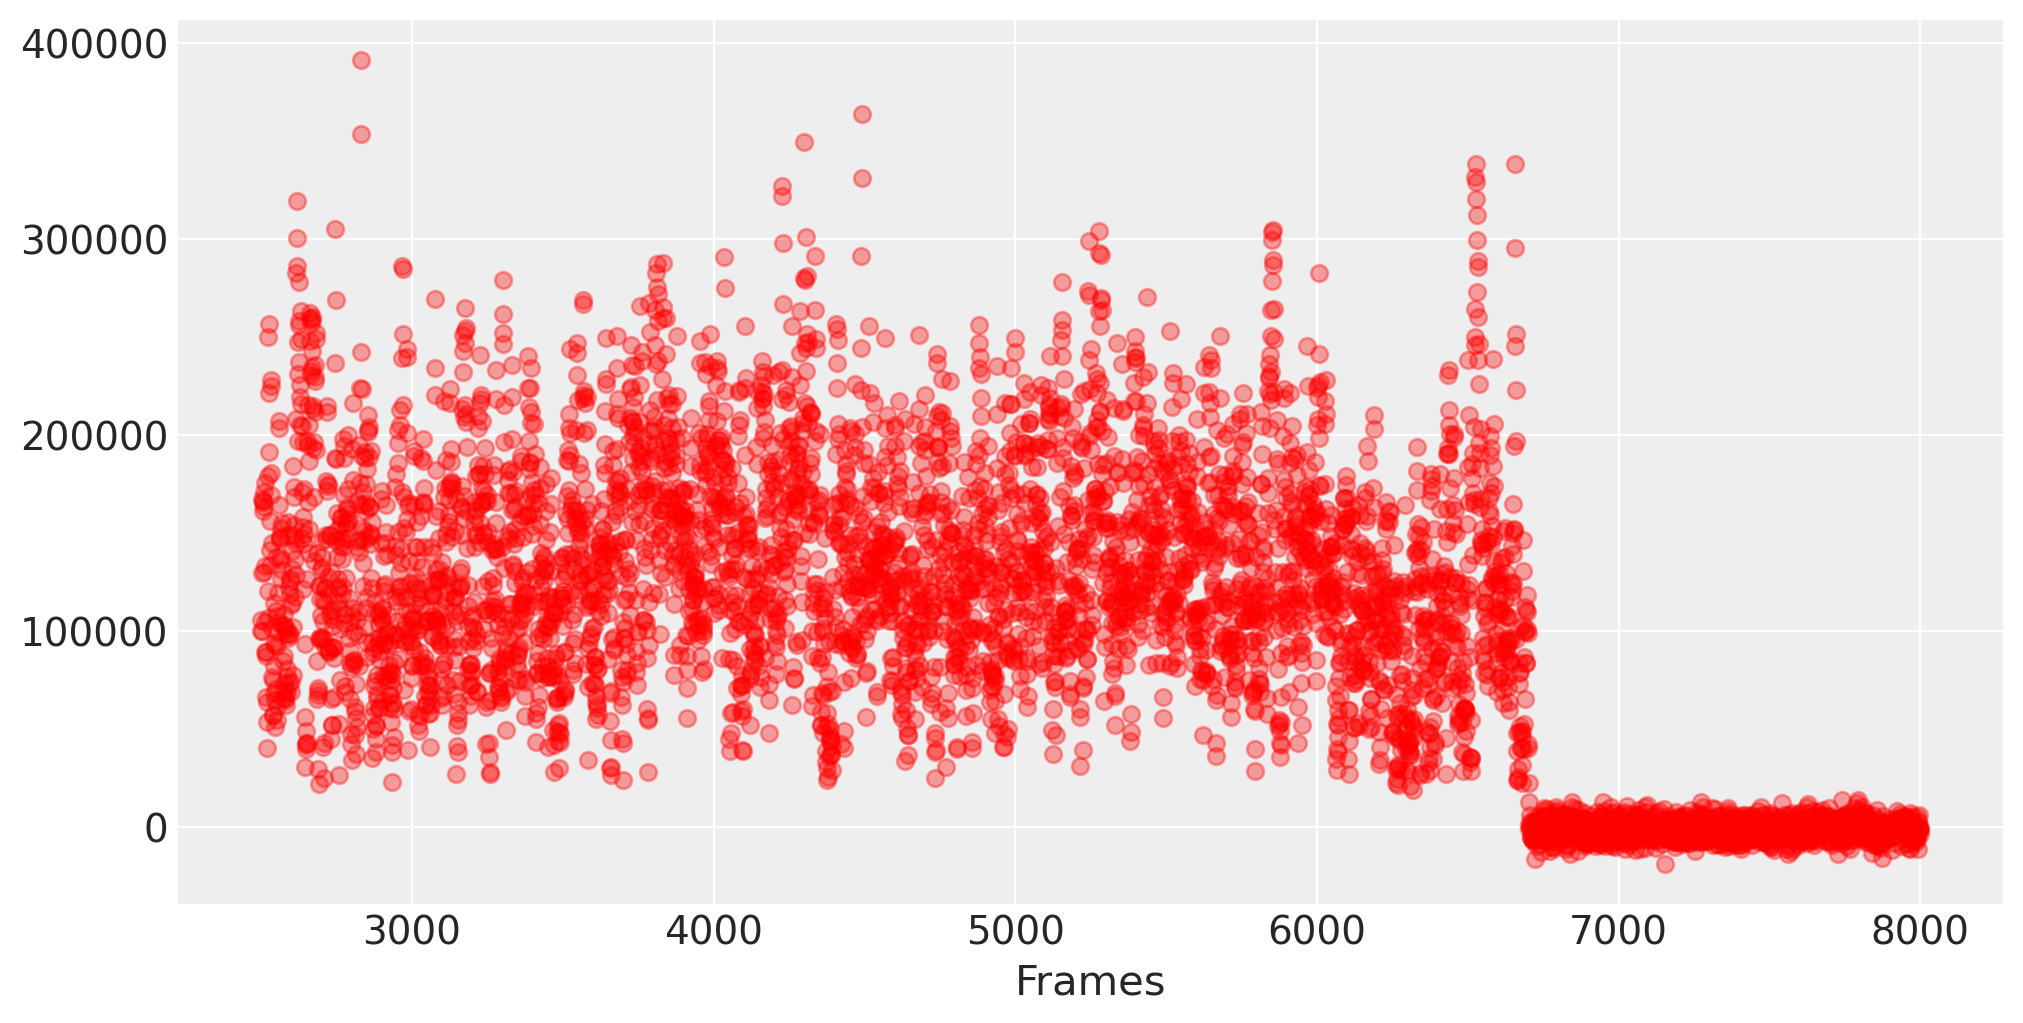

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## *Data smoothing*

In [65]:
# from scipy.signal import savgol_filter

# x = data_cp['Frame']
# y = data_cp['Value']
# y_filtered = savgol_filter(y, 10, 3)

In [66]:
# plt.figure(figsize=(10,5))
# plt.scatter(x, y_filtered, c='r', marker='o', alpha=0.3)
# # plt.xlim(3300, 3700)

## Normalisasi

Text(0.5, 0, 'Frames')

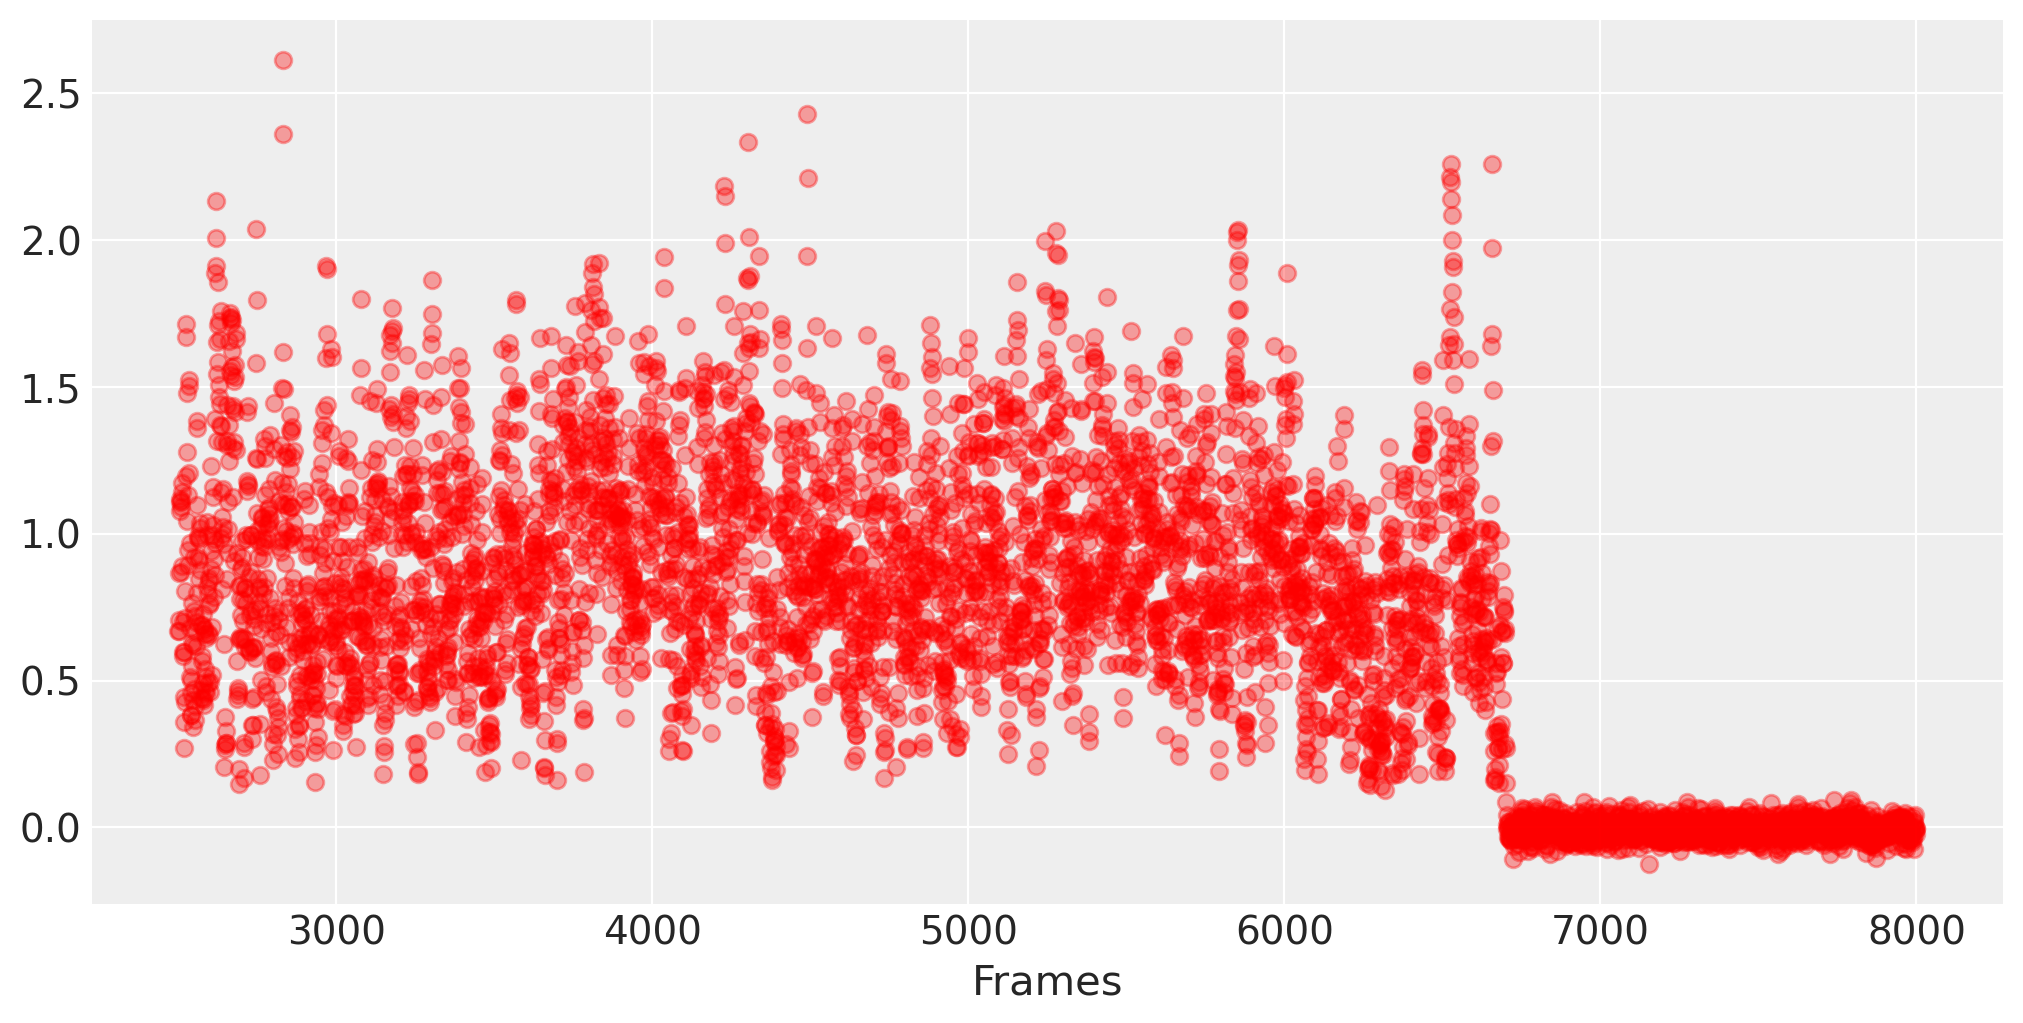

In [67]:
# data_cp['y_scaled'] = y_filtered/(y_filtered.std()*2)

data_cp['y_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_cp['Frame'], data_cp['y_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Frames')

In [68]:
# tulis ke dalam file csv yang baru
data_cp.to_csv('lc_sao184652.csv', header=False, columns=['JD', 'y_scaled'], index=False, sep='\t')

In [69]:
data_cp

,Frame,Time,Value,JD,frac_JD,y_scaled
0,2500.0,2022-08-10 17:45:26.606374,100267.0,2459802.2398912776,0.2398912776261568,0.6694800830043426
1,2501.0,2022-08-10 17:45:26.616474,105706.0,2459802.2398913945,0.23989139450713992,0.7057961408445155
2,2502.0,2022-08-10 17:45:26.626574,100198.0,2459802.2398915114,0.23989151138812304,0.6690193718458627
3,2503.0,2022-08-10 17:45:26.636673,129485.0,2459802.2398916283,0.23989162826910615,0.8645678892139717
4,2504.0,2022-08-10 17:45:26.646773,167446.0,2459802.239891745,0.23989174515008926,1.1180324730843163
...,...,...,...,...,...,...
5496,7996.0,2022-08-10 17:46:22.114162,6403.0,2459802.2405337286,0.2405337286181748,0.0427526601122683
5497,7997.0,2022-08-10 17:46:22.124262,-1297.0,2459802.2405338455,0.2405338454991579,-0.008660034384759017
5498,7998.0,2022-08-10 17:46:22.134362,-185.0,2459802.2405339624,0.24053396238014102,-0.001235240062590916
5499,7999.0,2022-08-10 17:46:22.144461,-1041.0,2459802.2405340793,0.24053407926112413,-0.006950729217065641


## Kurva cahaya untuk `SORA`

In [14]:
lc = LightCurve(name='SAO 184652', file='lc_sao184652.csv', exptime=0.01)

print(lc)

Light curve name: SAO 184652
Initial time: 2022-08-09 17:45:26.606 UTC
End time:     2022-08-09 17:46:22.155 UTC
Duration:     0.926 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 5501


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




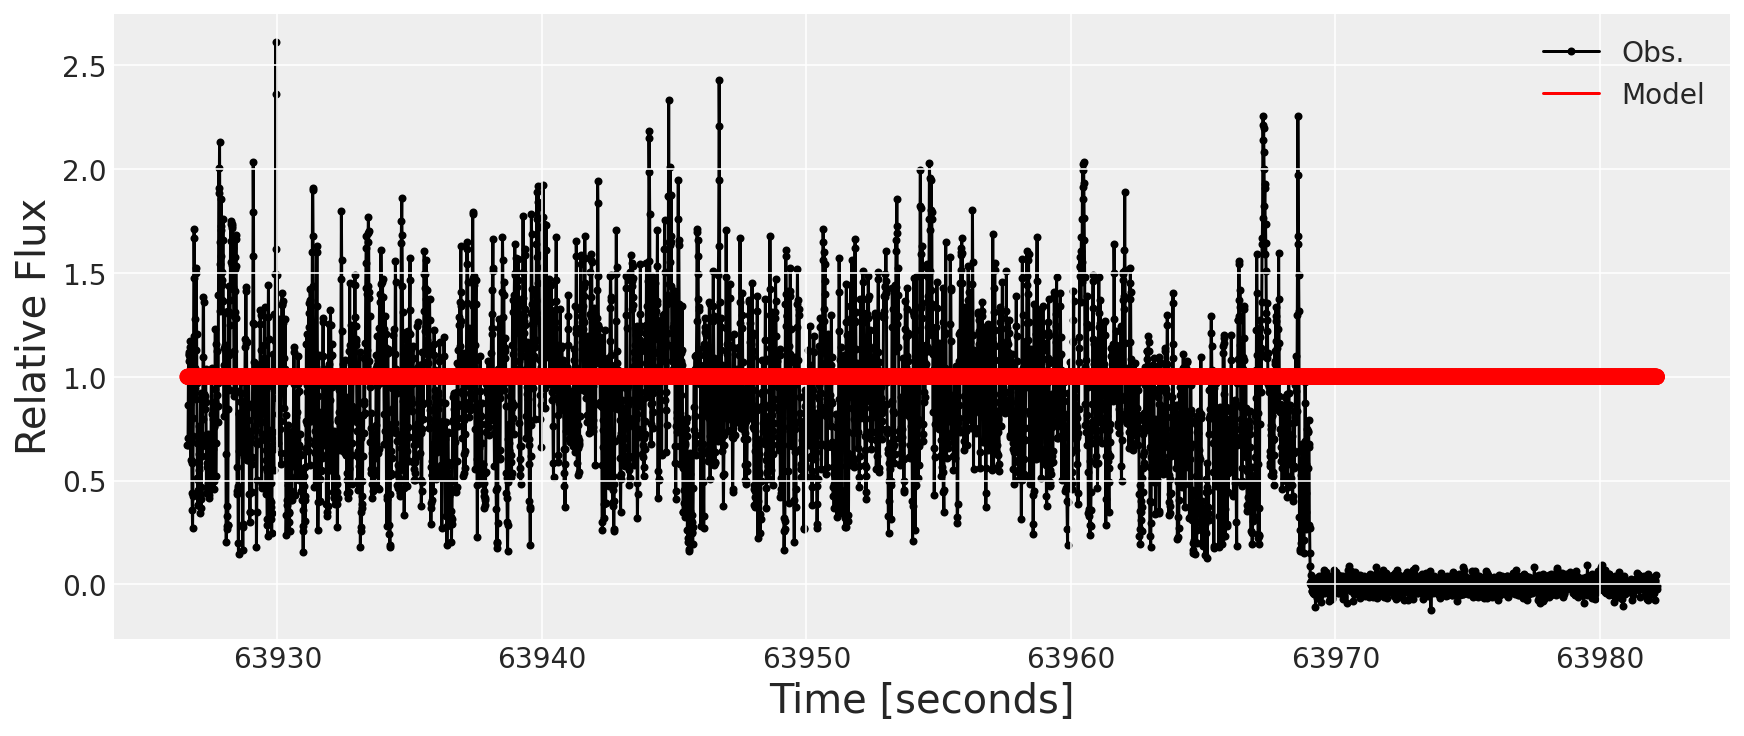

In [15]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 13.14321979880333,
 'central_time': 63920.03502443433,
 'immersion_time': 63913.46341453493,
 'emersion_time': 63926.60663433373,
 'time_err': 0.005049258470535278,
 'depth': 0.9031925902797794,
 'depth_err': 0.03900728096403959,
 'baseline': 0.8991323294707769,
 'baseline_err': 0.3658849790060951,
 'snr': 23.1544616276234,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

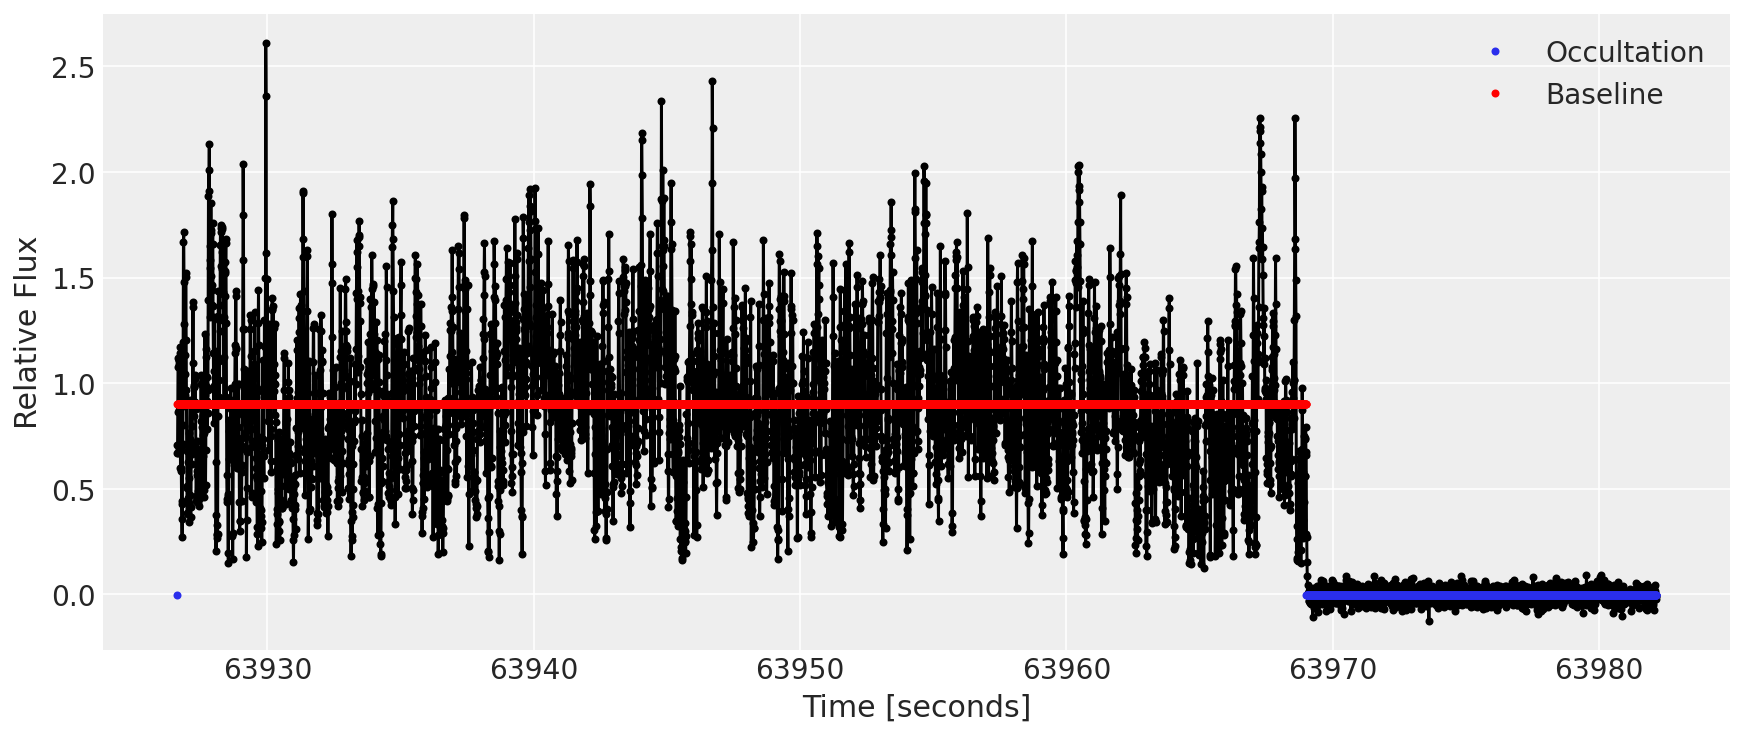

In [16]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **7 Agustus 2022 pukul 17:46:9.1 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [17]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 8, 7, 17, 46, 9.1)

In [18]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [19]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [20]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

16h 51m 52.66s
-24deg 46' 47.7"
0.0024500369145537965


In [21]:
d_moon = distance.au
d_moon

0.0024500369145537965

In [22]:
lc.set_dist(dist=d_moon)

lc.dist

0.0024500369145537965

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [23]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [24]:
lc.fresnel_scale

0.009997653866412421

In [25]:
from sora import Star
from sora.star import kervella, van_belle

In [26]:
star = Star(coord='16 48 13.8 -24 31 36')


1 Gaia-EDR3 star found G=6.29907
star coordinate at J2016.0: RA=16h48m13.81809s +/- 0.0228 mas, DEC=-24d31m36.1544s +/- 0.0098 mas



In [27]:
star.mag

{'G': 6.29907,
 'B': 8.871000289916992,
 'V': 7.129000186920166,
 'R': 6.25,
 'J': 3.812999963760376,
 'H': 2.86899995803833,
 'K': 2.6519999504089355}

In [28]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-08-07 17:46:9.1', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

16h48m13.8129703570s -24d31m36.2417164583s


In [29]:
star.error_at(time='2022-08-07 17:46:9.1')

(<Quantity 0.20075714 mas>, <Quantity 0.12366361 mas>)

In [30]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.0037522 km>

In [31]:
diameter.value

0.0037522039348084828

In [32]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [33]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.9512*kms # dari Occult v4

lin_vel

<Quantity 0.9512 km / s>

In [34]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 13.14321979880333,
 'central_time': 63920.03502443433,
 'immersion_time': 63913.46341453493,
 'emersion_time': 63926.60663433373,
 'time_err': 0.005049258470535278,
 'depth': 0.9031925902797794,
 'depth_err': 0.03900728096403959,
 'baseline': 0.8991323294707769,
 'baseline_err': 0.3658849790060951,
 'snr': 23.1544616276234,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

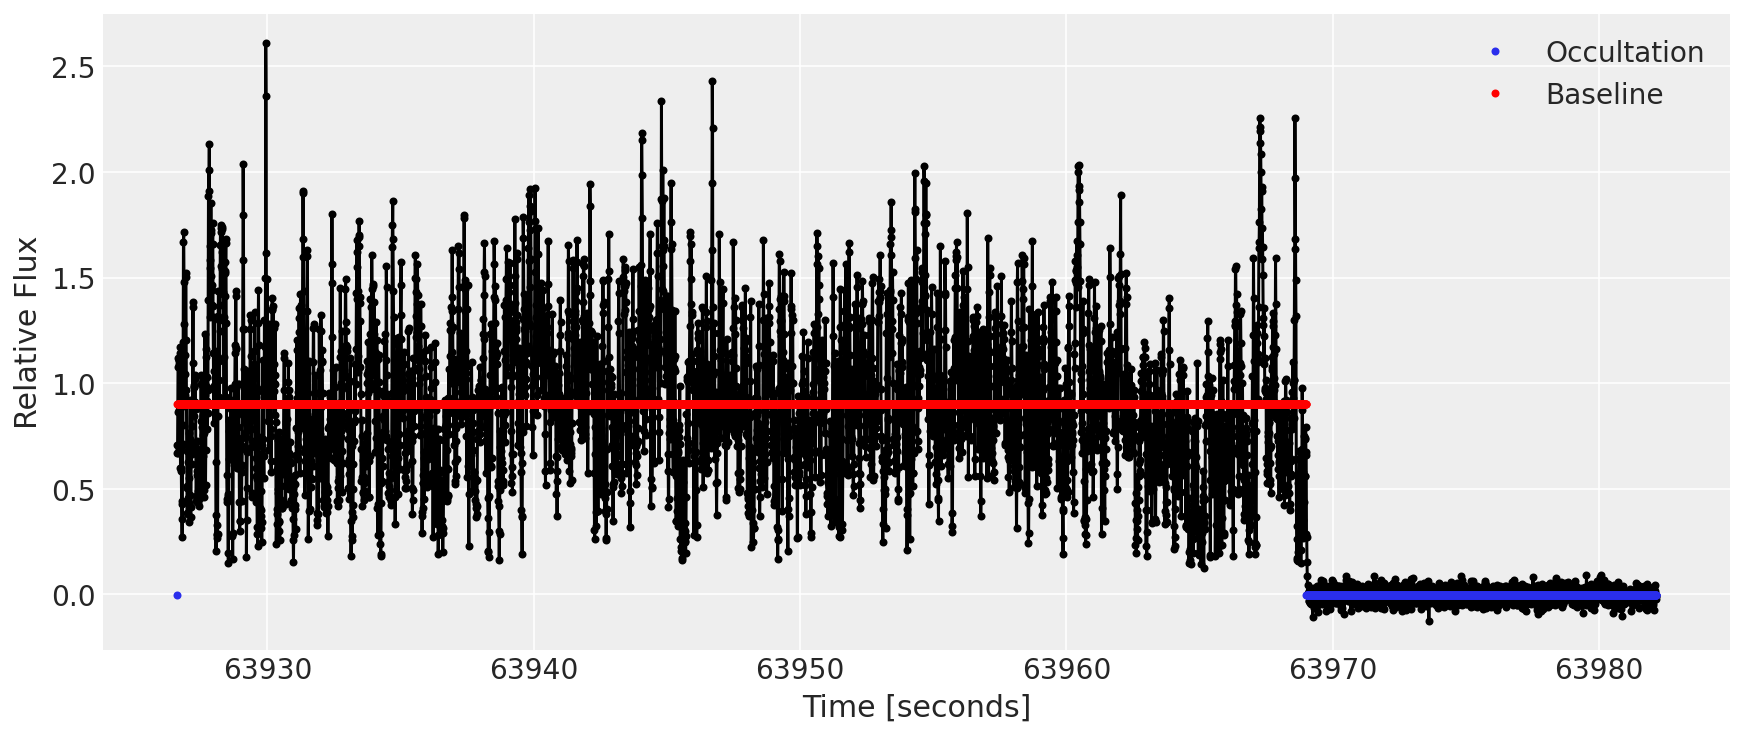

In [35]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [46]:
immersion_time = 63968.863  # seconds relative to tref
emersion_time  = 63980  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 5 # seconds relative to tref
tmax = emersion_time   + 5 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

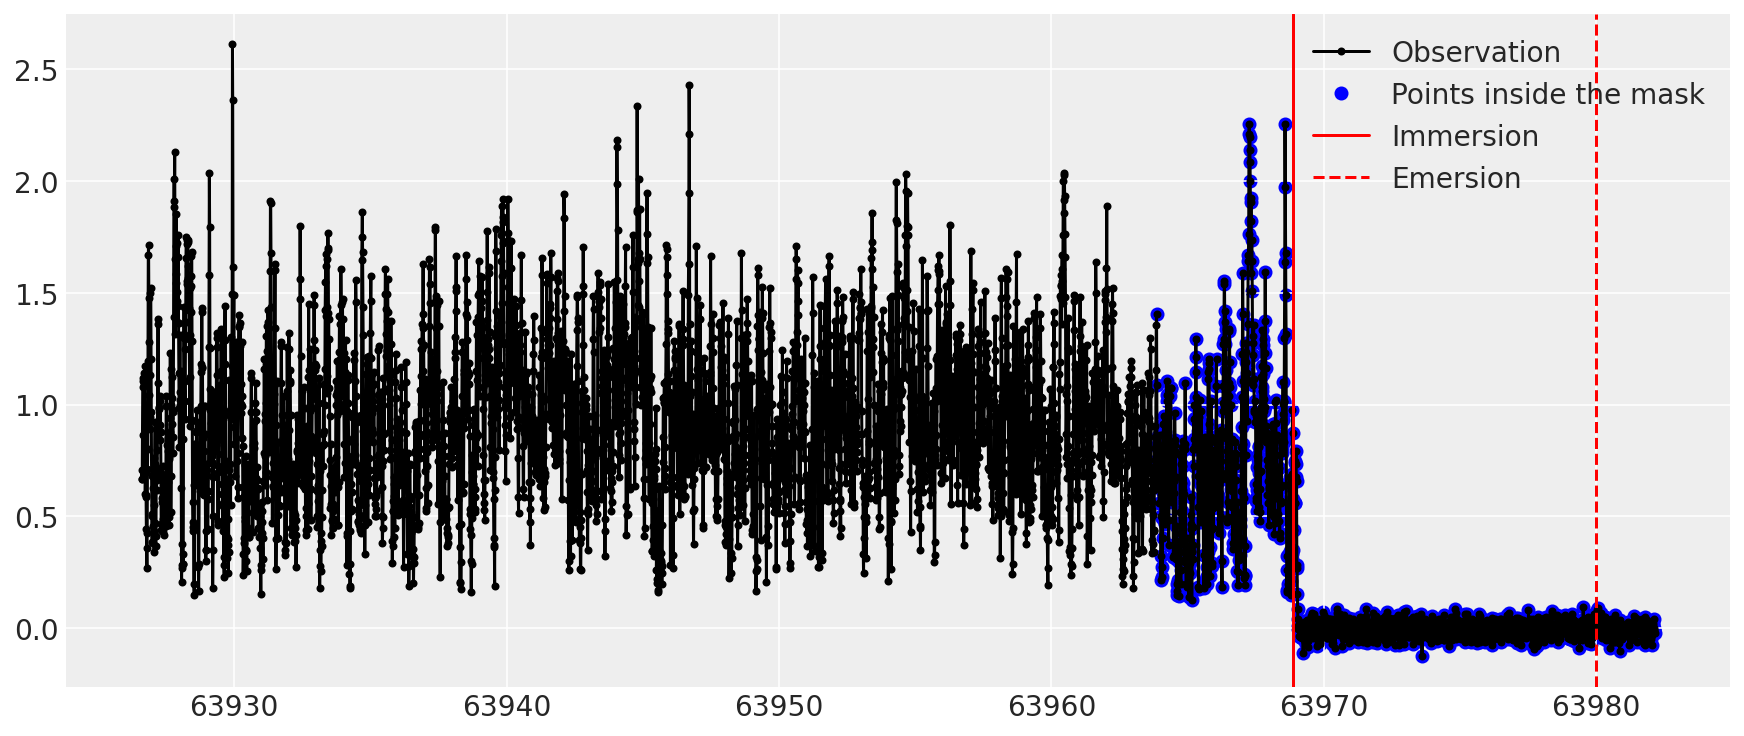

In [47]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()

In [48]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [49]:
print(lc_chi2)

Minimum chi-square: 2606.533
Number of fitted points: 2603
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.002

immersion:
    1-sigma: 63913.463 +/- 0.025
    3-sigma: 63913.463 +/- 0.025

emersion:
    1-sigma: 63926.595 +/- 0.014
    3-sigma: 63926.607 +/- 0.025



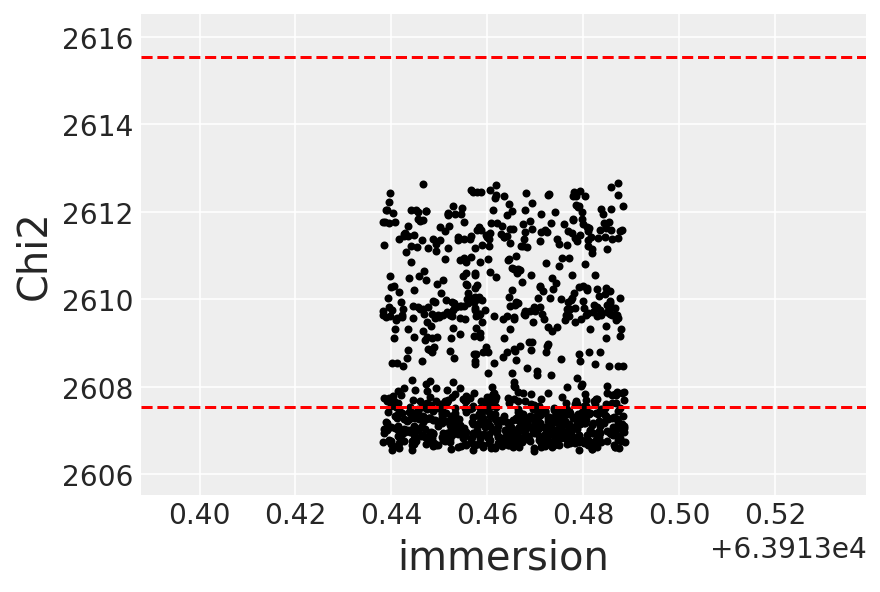

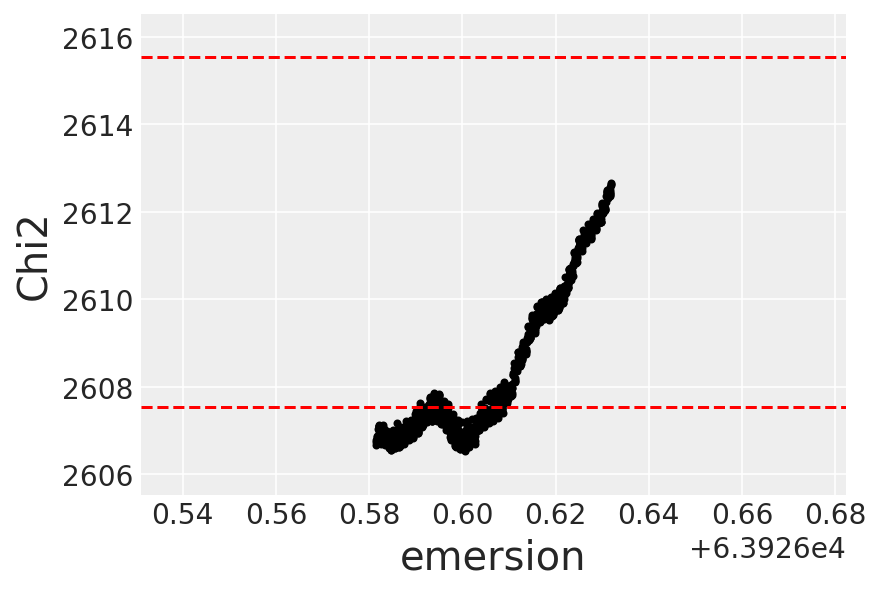

In [50]:
lc_chi2.plot_chi2()

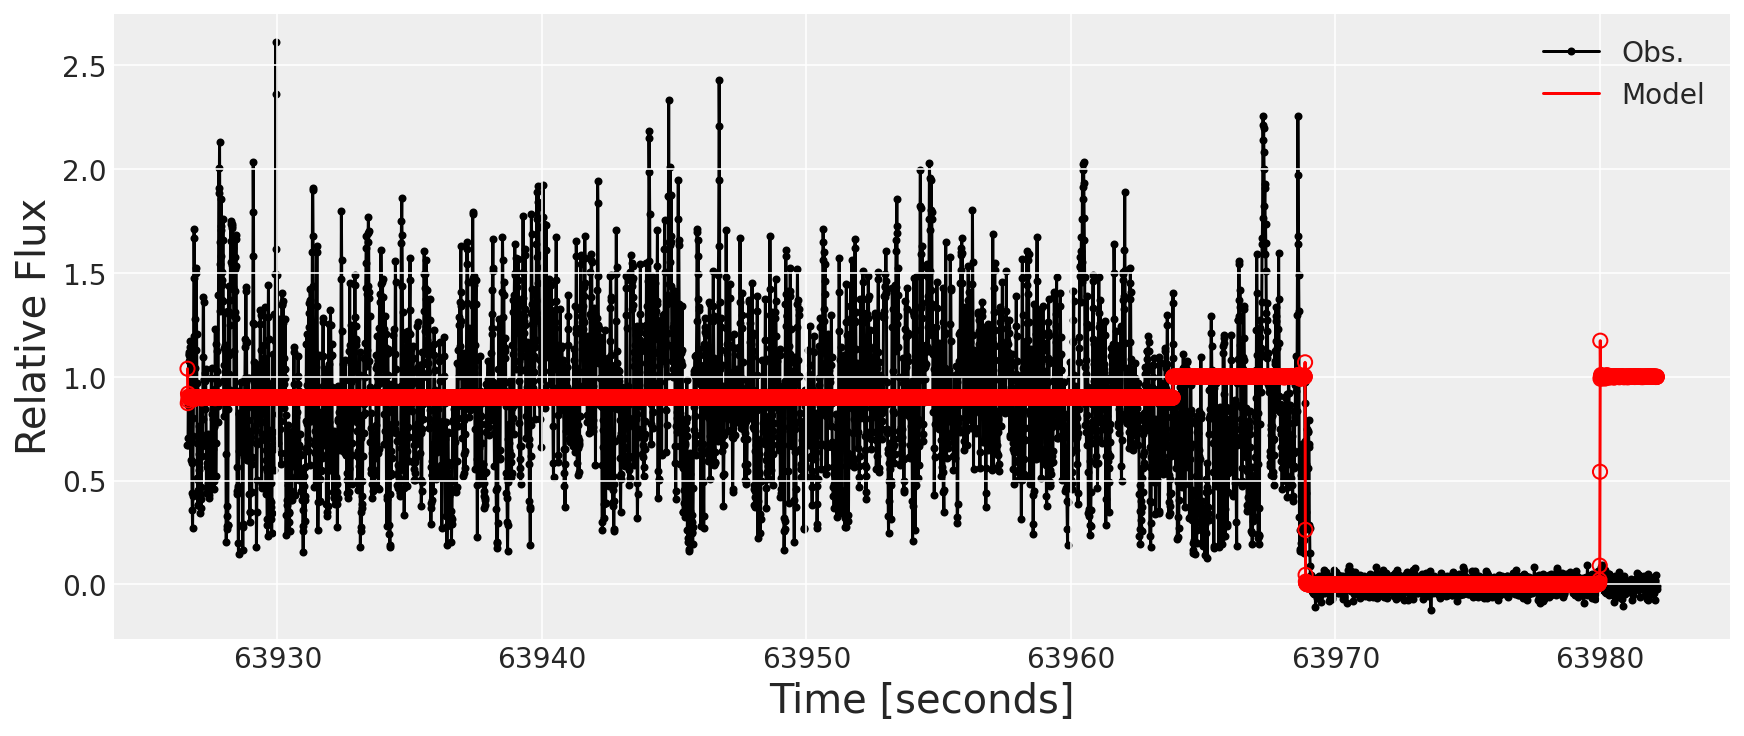

In [51]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(50680,50682)
# plt.ylim(-0.5,3)

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

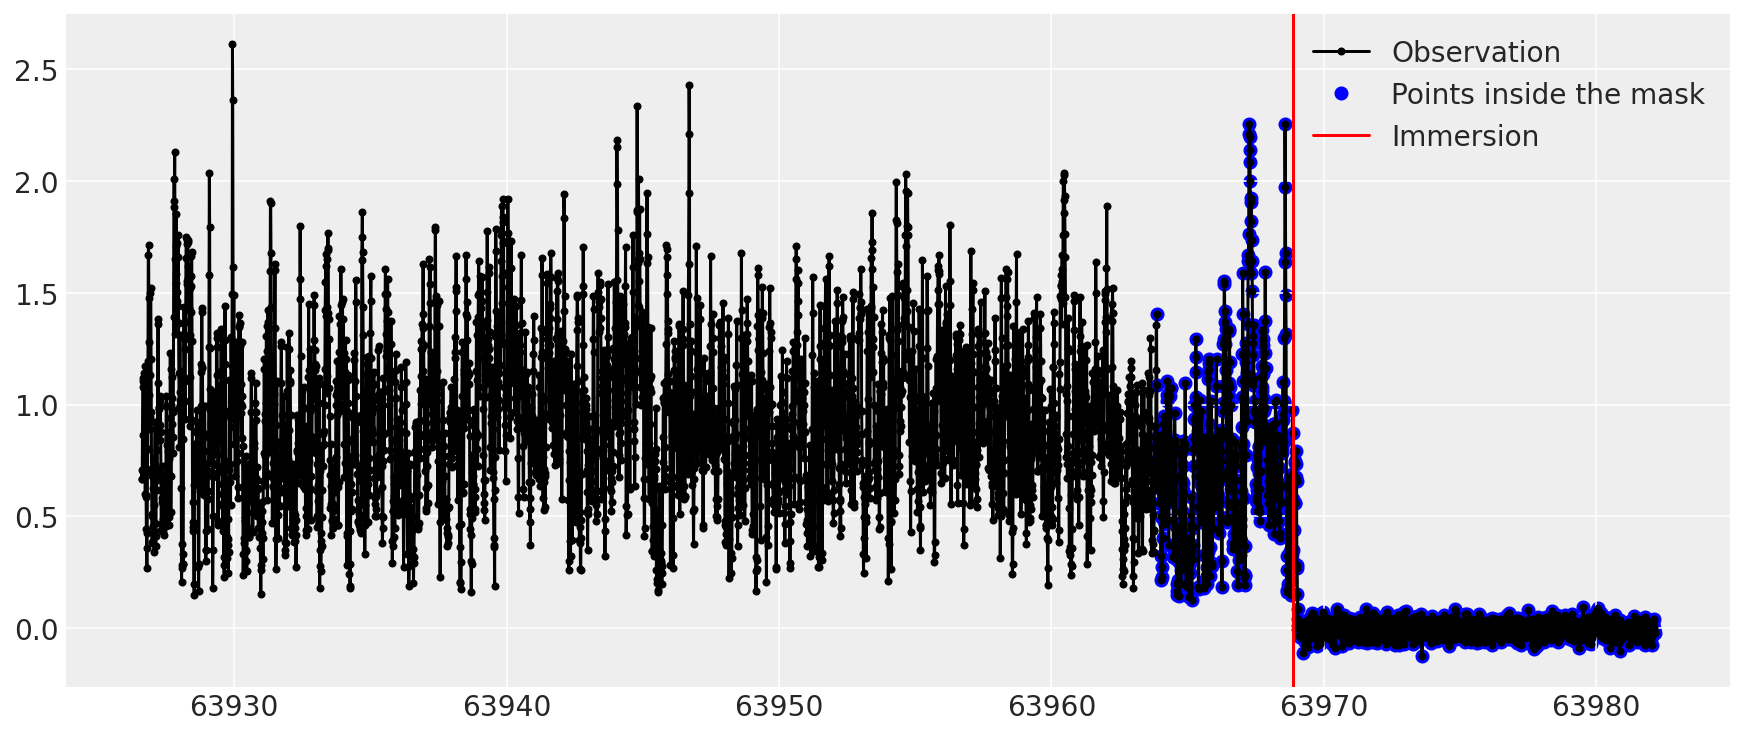

In [52]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [53]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [54]:
print(lc_chi2_imm)

Minimum chi-square: 693.122
Number of fitted points: 1812
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.383

immersion:
    1-sigma: 63968.877 +/- 0.006
    3-sigma: 63968.867 +/- 0.016



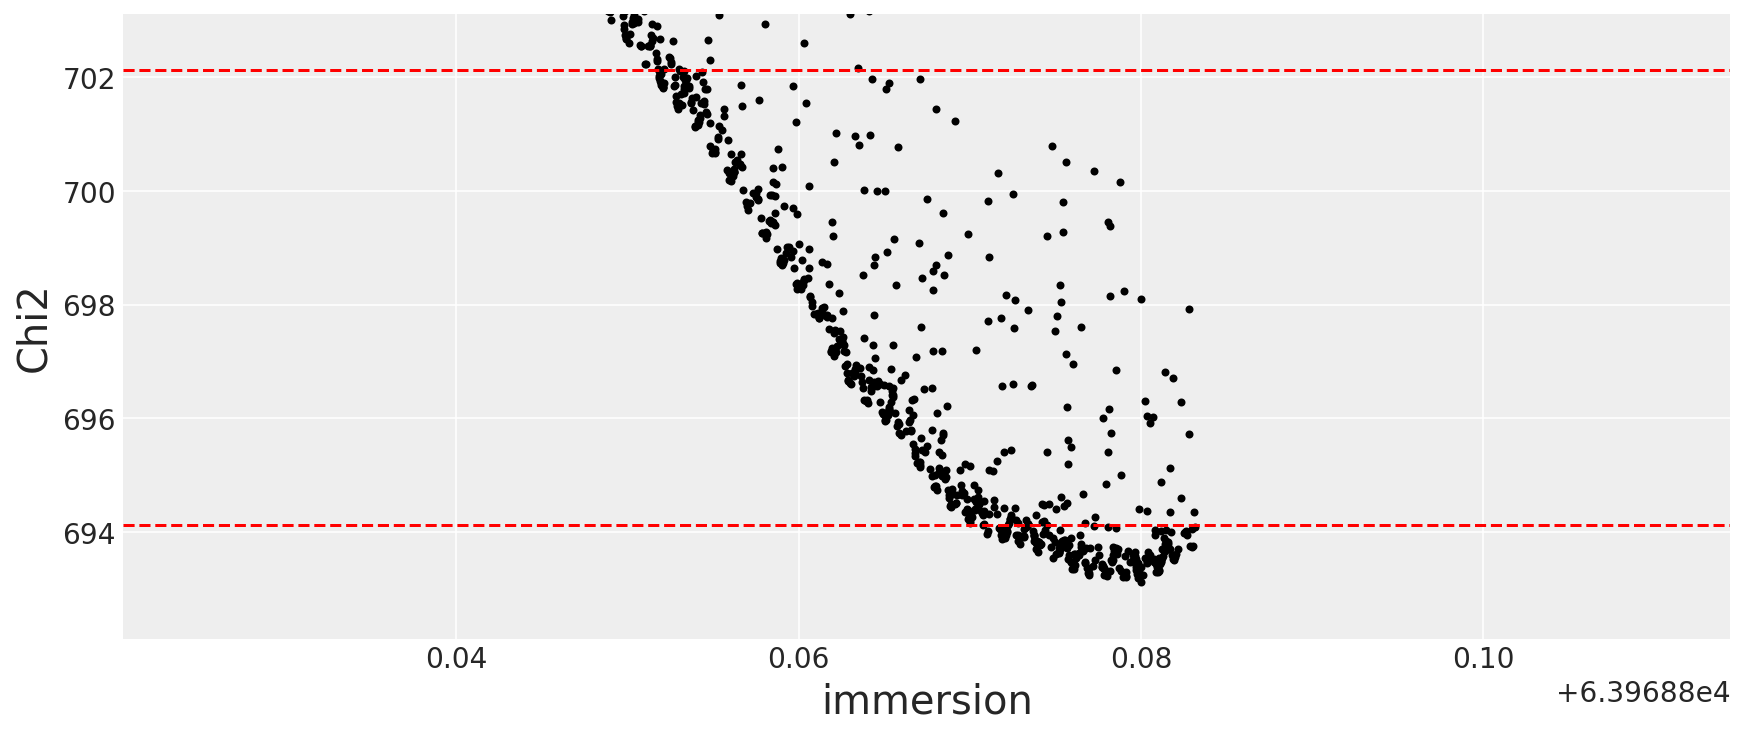

In [55]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [56]:
print(lc)

Light curve name: SAO 184652
Initial time: 2022-08-09 17:45:26.606 UTC
End time:     2022-08-09 17:46:22.155 UTC
Duration:     0.926 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 5501

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.951 km/s
Fresnel scale:        0.011 seconds or 0.01 km
Stellar size effect:  0.004 seconds or 0.00 km
Inst. response:       0.010 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.899
Modelled bottomflux:  0.097
Light curve sigma:    0.390

Immersion time: 2022-08-09 17:46:08.877 UTC +/- 0.006 seconds
Emersion time:  2022-08-09 17:45:26.595 UTC +/- 0.014 seconds

Monte Carlo chi square fit.

Minimum chi-square: 693.122
Number of fitted points: 1812
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.383

immersion:
    1-si

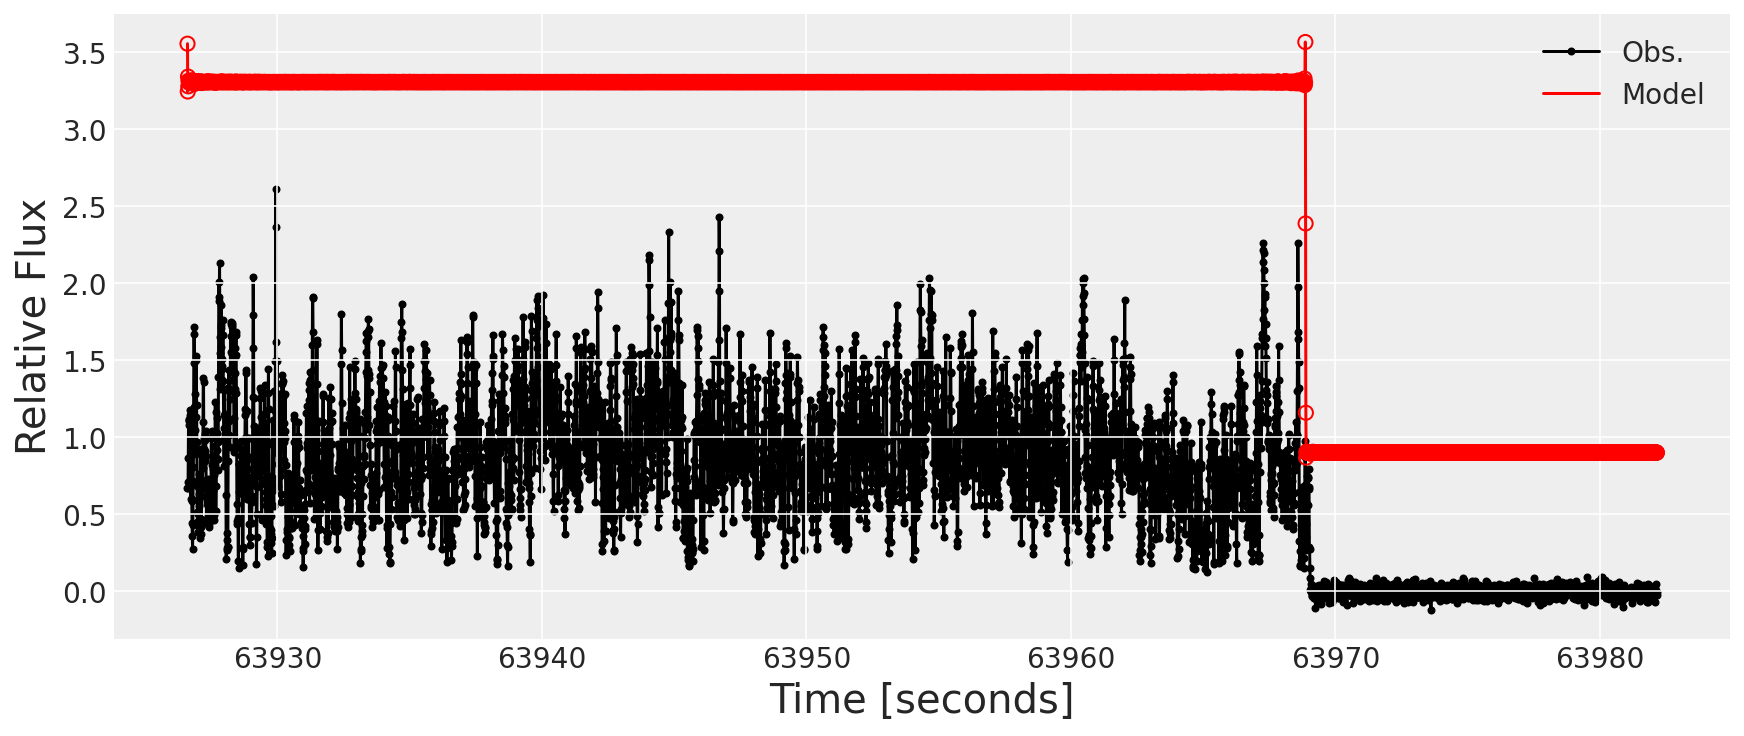

In [58]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(52297, 52300)

In [ ]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(52297, 52300)
# plt.ylim(-0.25, 1.5)

In [ ]:
lc.immersion